In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("CarData.csv")
data

,buying,maint,Doors,Persons,lug_boot,safty,Classvalue
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   lug_boot    1728 non-null   object
 5   safty       1728 non-null   object
 6   Classvalue  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]


In [6]:
data.describe().T

,count,unique,top,freq
buying,1728,4,high,432
maint,1728,4,high,432
Doors,1728,4,4,432
Persons,1728,3,4,576
lug_boot,1728,3,big,576
safty,1728,3,high,576
Classvalue,1728,4,unacc,1210


In [7]:
X = data.iloc[:, :-1].values

In [8]:
X

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ...,
       ['low', 'low', '5more', 'more', 'big', 'low'],
       ['low', 'low', '5more', 'more', 'big', 'med'],
       ['low', 'low', '5more', 'more', 'big', 'high']], dtype=object)

In [9]:
y = data.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])

In [11]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]], dtype=object)

In [12]:
y = y.reshape(-1, 1)

In [13]:
y 

array([['unacc'],
       ['unacc'],
       ['unacc'],
       ...,
       ['unacc'],
       ['good'],
       ['vgood']], dtype=object)

In [14]:
y[:, 0] = le.fit_transform(y[:, 0])

In [15]:
y = np.array(y).astype('int')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [18]:
from sklearn.model_selection import cross_val_score

def scores(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log_scores =  cross_val_score(log, X_train, y_train, cv=10)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_train, y_train, cv=10)


    from sklearn.svm import SVC
    svm_lin = SVC(kernel="linear")
    svm_lin_scores = cross_val_score(svm_lin, X_train, y_train, cv=10)

    from sklearn.svm import SVC
    svm_rbf = SVC(kernel='rbf')
    svm_rbf_scores = cross_val_score(svm_rbf, X_train, y_train, cv=10)

    from sklearn.naive_bayes import GaussianNB
    gauss = KNeighborsClassifier()
    gauss_scores = cross_val_score(gauss, X_train, y_train, cv=10)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)

    from sklearn.ensemble import RandomForestClassifier
    forest= RandomForestClassifier()
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)

    print('[0]Logistic Regression Training Scores:', log_scores.mean())
    print('[1]K Nearest Neighbor Training Scores:', knn_scores.mean())
    print('[2]Support Vector Machine (Linear Classifier) Training Scores:', svm_lin_scores.mean())
    print('[3]Support Vector Machine (RBF Classifier) Training Scores:', svm_rbf_scores.mean())
    print('[4]Gaussian Naive Bayes Training Scores:', gauss_scores.mean())
    print('[5]Decision Tree Classifier Training Scores:', tree_scores.mean())
    print('[6]Random Forest Classifier Training Scores:', forest_scores.mean())
  
    return log_scores, knn_scores, svm_lin_scores, svm_rbf_scores, gauss_scores, tree_scores, forest_scores


In [19]:
score = scores(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

[0]Logistic Regression Training Scores: 0.691747471587947
[1]K Nearest Neighbor Training Scores: 0.907381920550516
[2]Support Vector Machine (Linear Classifier) Training Scores: 0.7279167969971849
[3]Support Vector Machine (RBF Classifier) Training Scores: 0.9016160984256073
[4]Gaussian Naive Bayes Training Scores: 0.907381920550516
[5]Decision Tree Classifier Training Scores: 0.973240538004379
[6]Random Forest Classifier Training Scores: 0.9754092378271297


# Fitting the Model

In [20]:
def models(X_train, Y_train):

    # Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Using KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    # Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)

    # Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)

    # Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    # Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)

    # Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(
        n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:',
          log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:',
          knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:',
          svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:',
          svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:',
          gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:',
          tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:',
          forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [21]:
model = models(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-20-8e7e36e3ca50>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\lenovo\anaco

[0]Logistic Regression Training Accuracy: 0.6939218523878437
[1]K Nearest Neighbor Training Accuracy: 0.9630969609261939
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7293777134587555
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9406657018813314
[4]Gaussian Naive Bayes Training Accuracy: 0.6396526772793053
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9985528219971056


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model[0].predict(X_test))

print(cm)

for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()


[[ 17   0  60   7]
 [  1   0  13   0]
 [ 15   0 218   2]
 [  3   0   5   5]]
[[ 17   0  60   7]
 [  1   0  13   0]
 [ 15   0 218   2]
 [  3   0   5   5]]
Model[0] Testing Accuracy = "0.9444444444444444!"

[[ 64   4  16   0]
 [  8   6   0   0]
 [  2   1 232   0]
 [  4   0   1   8]]
Model[1] Testing Accuracy = "0.8536585365853658!"

[[ 16   0  68   0]
 [  0   0  14   0]
 [  2   0 233   0]
 [  7   0   6   0]]
Model[2] Testing Accuracy = "1.0!"

[[ 69   2  12   1]
 [ 10   4   0   0]
 [  2   0 233   0]
 [  5   0   0   8]]
Model[3] Testing Accuracy = "0.8588235294117647!"

[[  7   0  29  48]
 [  7   0   4   3]
 [  1   0 183  51]
 [  0   0   0  13]]
Model[4] Testing Accuracy = "0.5!"

[[ 77   3   3   1]
 [  2  12   0   0]
 [  1   0 234   0]
 [  0   0   0  13]]
Model[5] Testing Accuracy = "0.9468085106382979!"

[[ 79   3   2   0]
 [  4  10   0   0]
 [  5   0 230   0]
 [  3   0   0  10]]
Model[6] Testing Accuracy = "0.9270833333333334!"



# Accuracy Scores

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(X_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.47      0.20      0.28        84
           1       0.00      0.00      0.00        14
           2       0.74      0.93      0.82       235
           3       0.36      0.38      0.37        13

    accuracy                           0.69       346
   macro avg       0.39      0.38      0.37       346
weighted avg       0.63      0.69      0.64       346

0.6936416184971098

Model  1
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        84
           1       0.55      0.43      0.48        14
           2       0.93      0.99      0.96       235
           3       1.00      0.62      0.76        13

    accuracy                           0.90       346
   macro avg       0.82      0.70      0.75       346
weighted avg       0.89      0.90      0.89       346

0.8959537572254336

Model  2
              precision    recall  f1-score   support

        

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



0.9075144508670521

Model  4
              precision    recall  f1-score   support

           0       0.47      0.08      0.14        84
           1       0.00      0.00      0.00        14
           2       0.85      0.78      0.81       235
           3       0.11      1.00      0.20        13

    accuracy                           0.59       346
   macro avg       0.36      0.47      0.29       346
weighted avg       0.69      0.59      0.59       346

0.5867052023121387

Model  5
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        84
           1       0.80      0.86      0.83        14
           2       0.99      1.00      0.99       235
           3       0.93      1.00      0.96        13

    accuracy                           0.97       346
   macro avg       0.92      0.94      0.93       346
weighted avg       0.97      0.97      0.97       346

0.9710982658959537

Model  6
              precision    recall  f1-scor

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


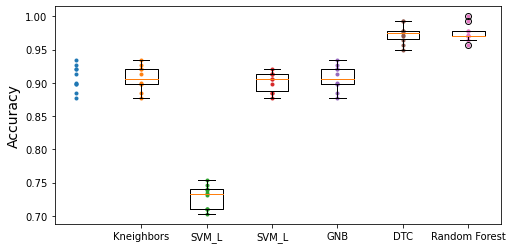

In [24]:
plt.figure(figsize=(8, 4))
plt.plot([0]*10, score[1], ".")
plt.plot([1]*10, score[1], ".")
plt.plot([2]*10, score[2], ".")
plt.plot([3]*10, score[3], ".")
plt.plot([4]*10, score[4], ".")
plt.plot([5]*10, score[5], ".")
plt.plot([6]*10, score[6], ".")
plt.boxplot([score[1], score[2],score[3],score[4],score[5],score[6]], labels=("Kneighbors","SVM_L","SVM_L","GNB","DTC","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [25]:
y_pred= model[6].predict(X_test)

In [26]:
y_pred = y_pred.reshape(-1, 1)

## Creating a dataframe for viewing the predicted and actual at the same time 

In [27]:
y_pred = np.array(y_pred)

In [28]:
y_test = np.array(y_test)

In [29]:
y_test

array([[1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [3],
       [2],
       [3],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [3],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [3],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
    

In [31]:
y_train = np.array(y_train)

In [32]:
# Putting the predicted and test in the same numpy array
Collection = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [33]:
View = pd.DataFrame(Collection, columns=["Predicted", "Actual"])

In [34]:
View

,Predicted,Actual
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
...,...,...
341,2,2
342,2,2
343,2,2
344,2,2


## With Actual Values 


In [32]:
Test1 = le.inverse_transform(y_pred)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
Test2 = le.inverse_transform(y_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [34]:
Collection2 = np.concatenate((Test1.reshape(len(Test1),1), Test2.reshape(len(Test2),1)),1)

In [35]:
View2 = pd.DataFrame(Collection2, columns=["Predicted", "Actual"])


In [36]:
View2

,Predicted,Actual
0,good,good
1,unacc,unacc
2,acc,acc
3,acc,acc
4,acc,acc
...,...,...
341,acc,acc
342,unacc,unacc
343,unacc,unacc
344,unacc,unacc
